In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns; sns.set()
import os
import pickle

In [2]:
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

import random 
import math

from sklearn.decomposition import PCA

from sklearn import preprocessing

import pandas_profiling

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import GenericUnivariateSelect, SelectFdr

import gc

from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif


from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import LeaveOneOut

from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import RobustScaler

from random import seed
from random import randint
from imblearn.over_sampling import SMOTE

from sklearn import metrics

from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import precision_recall_fscore_support
from pandas.testing import assert_frame_equal
from sklearn.preprocessing import OneHotEncoder

In [3]:
TRUTH_PATH="data_synthea_tst/"
PREDICT_PATH="Predictions/"

In [4]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
def roc(y, pred, labelstr):
  pred=pred.sort_index()
  ns_auc = roc_auc_score(y, pred)
  print('ROC AUC=%.3f' % (ns_auc))
  ns_fpr, ns_tpr, _ = roc_curve(y, pred)
  plt.plot(ns_fpr, ns_tpr, linestyle='--', label=labelstr)

In [6]:
truth_outcome = pd.read_csv(TRUTH_PATH+"challenge_outcomes.csv").sort_values(by=['patienticn']).set_index(['patienticn']).fillna(0)

ROC AUC=0.815
ROC AUC=0.815
ROC AUC=0.812


/home/luoqi/projects/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/luoqi/projects/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


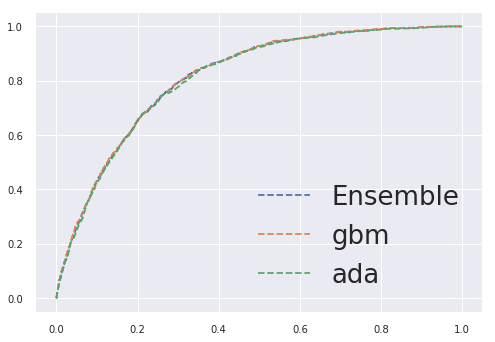

In [7]:
T = pd.read_csv(PREDICT_PATH+"Ensemble/alive_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["death"]], T, 'Ensemble')
T = pd.read_csv(PREDICT_PATH+"gbm/alive_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["death"]], T, 'gbm')
T = pd.read_csv(PREDICT_PATH+"ada/alive_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["death"]], T, 'ada')
plt.legend(loc="lower right", prop={"size":26})

ROC AUC=1.000
ROC AUC=1.000
ROC AUC=1.000


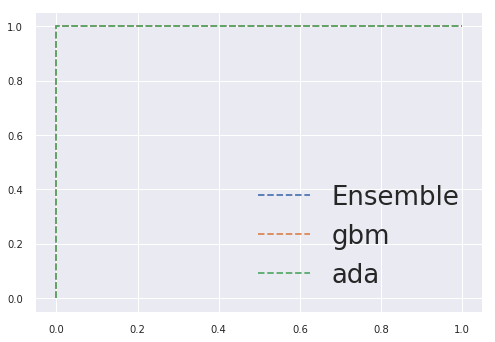

In [8]:
T = pd.read_csv(PREDICT_PATH+"Ensemble/status_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["covid_status"]], T, 'Ensemble')
T = pd.read_csv(PREDICT_PATH+"gbm/status_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["covid_status"]], T, 'gbm')
T = pd.read_csv(PREDICT_PATH+"ada/status_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["covid_status"]], T, 'ada')
plt.legend(loc="lower right", prop={"size":26})

ROC AUC=0.780
ROC AUC=0.781
ROC AUC=0.777


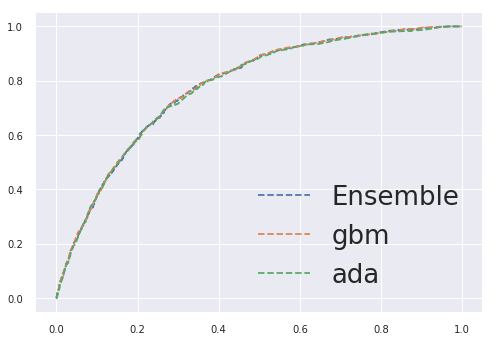

In [9]:
T = pd.read_csv(PREDICT_PATH+"Ensemble/vent_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["vent_req"]], T, 'Ensemble')
T = pd.read_csv(PREDICT_PATH+"gbm/vent_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["vent_req"]], T, 'gbm')
T = pd.read_csv(PREDICT_PATH+"ada/vent_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
roc(truth_outcome[["vent_req"]], T, 'ada')
plt.legend(loc="lower right", prop={"size":26})

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
#days in ICU
T = pd.read_csv(PREDICT_PATH+"gbm/icu_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
np.sqrt(mean_squared_error(T, truth_outcome[["days_icu"]]))

1.6053717458875163

In [12]:
T = pd.read_csv(PREDICT_PATH+"ada/icu_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
np.sqrt(mean_squared_error(T, truth_outcome[["days_icu"]]))

1.6070491338041495

In [13]:
T = pd.read_csv(PREDICT_PATH+"Ensemble/icu_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
np.sqrt(mean_squared_error(T, truth_outcome[["days_icu"]]))

1.6052797641623948

In [14]:
#days hospitalized
T = pd.read_csv(PREDICT_PATH+"gbm/days_hospitalized_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
np.sqrt(mean_squared_error(T, truth_outcome[["days_hospitalized"]]))

6.607121684788624

In [15]:
T = pd.read_csv(PREDICT_PATH+"ada/days_hospitalized_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
np.sqrt(mean_squared_error(T, truth_outcome[["days_hospitalized"]]))

6.610047811307186

In [16]:
T = pd.read_csv(PREDICT_PATH+"Ensemble/days_hospitalized_predict.tsv", names=['patienticn','Outcome']).sort_values(by=['patienticn']).set_index(['patienticn'])
np.sqrt(mean_squared_error(T, truth_outcome[["days_hospitalized"]]))

6.606664834622231